In [2]:
from __future__ import print_function
__author__= "xwu"
import os
from scipy.optimize import curve_fit, minimize
import pylab as pl
import numpy as np
import json

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [17]:
distribution = ['chisq'],['normal'],['binomial'],['geometric'],['gamma'],['poisson']

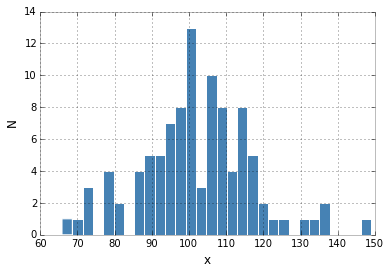

In [18]:
# The degree of freedom is equal to the mean in this chi-squared distribution.
mymean = 100
df = 100
mydistribution=np.random.chisquare(df, size=100)
s = json.load( open('fbb_matplotlibrc.json'))
pl.rcParams.update(s)
pl.hist(mydistribution,bins=30)
pl.ylabel('N')
pl.xlabel('x')

In [19]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydistribution.mean(), mydistribution.std()))

Chisq mean: 101.93, standard deviation: 14.90


In [20]:
sizes=2000/(np.array(range(1,100)+[10]))
print (sizes,sizes.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20  200] (100,)


In [27]:
distributions = {}
distributions ['chisq'] = {}
distributions ['normal'] = {}
distributions ['binomial'] = {}
distributions ['poisson'] = {}
distributions ['gamma'] = {}
distributions ['geometric'] = {}
# create a dictionary which include 6 distributions

In [28]:
for n in sizes:
    distributions ['chisq'][n] = np.random.chisquare(mymean,n)

In [37]:
for n in sizes:
    distributions ['normal'][n] = np.random.normal(mymean,30,n)
    distributions ['chisq'][n] = np.random.chisquare(mymean,n)
    distributions ['binomial'][n] = np.random.binomial(1000,0.1,n)
    distributions ['gamma'][n] = np.random.gamma(mymean,1,n)
    distributions ['geometric'][n] = np.random.geometric(0.01,n)
    distributions ['poisson'][n] = np.random.poisson(mymean,n)

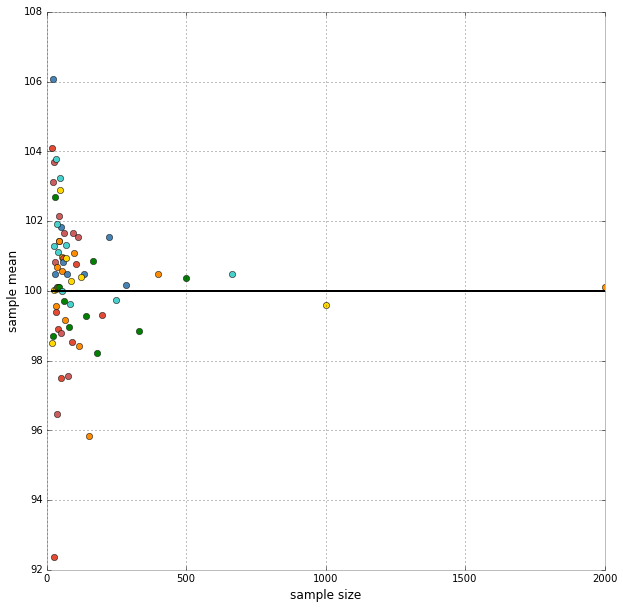

In [12]:
# plot the relationship between sample mean and sample size
means = {}
means['chisq'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111) # number of column, number of 
for nn in distributions['chisq'].iterkeys():
    means['chisq'][nn] = distributions['chisq'][nn].mean()
    axchisq_mu_n.plot(nn,distributions['chisq'][nn].mean(),'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(sizes),max(sizes)],[mymean,mymean],'k')


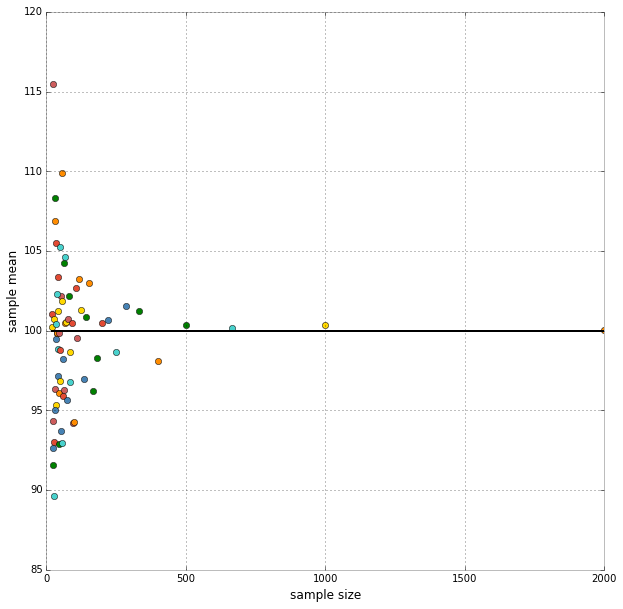

In [31]:
means['normal'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in distributions['normal'].iterkeys():
    means['normal'][nn] = distributions['normal'][nn].mean()
    axchisq_mu_n.plot(nn,distributions['normal'][nn].mean(),'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(sizes),max(sizes)],[mymean,mymean],'k')

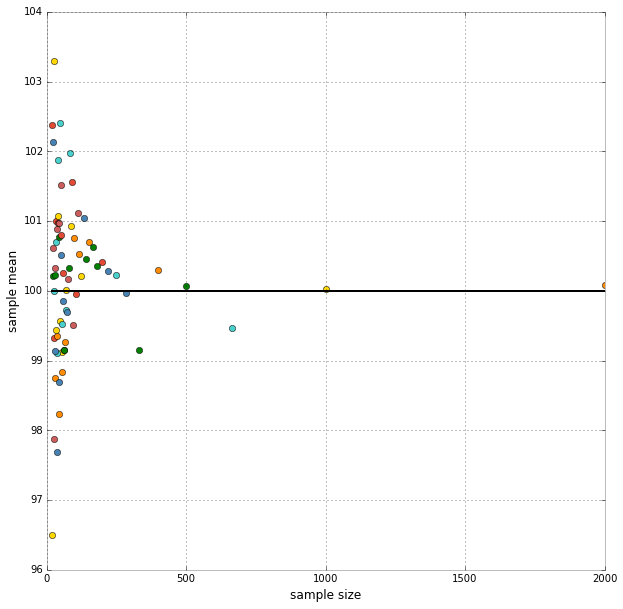

In [32]:
means['binomial'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111) 
for nn in distributions['binomial'].iterkeys():
    means['binomial'][nn] = distributions['binomial'][nn].mean()
    axchisq_mu_n.plot(nn,distributions['binomial'][nn].mean(),'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(sizes),max(sizes)],[mymean,mymean],'k')

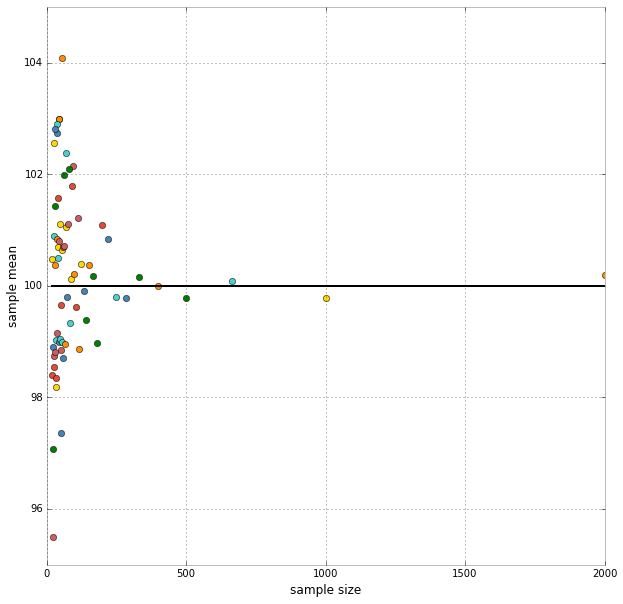

In [33]:
means['gamma'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111) # number of column, number of 
for nn in distributions['gamma'].iterkeys():
    means['gamma'][nn] = distributions['gamma'][nn].mean()
    axchisq_mu_n.plot(nn,distributions['gamma'][nn].mean(),'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(sizes),max(sizes)],[mymean,mymean],'k')

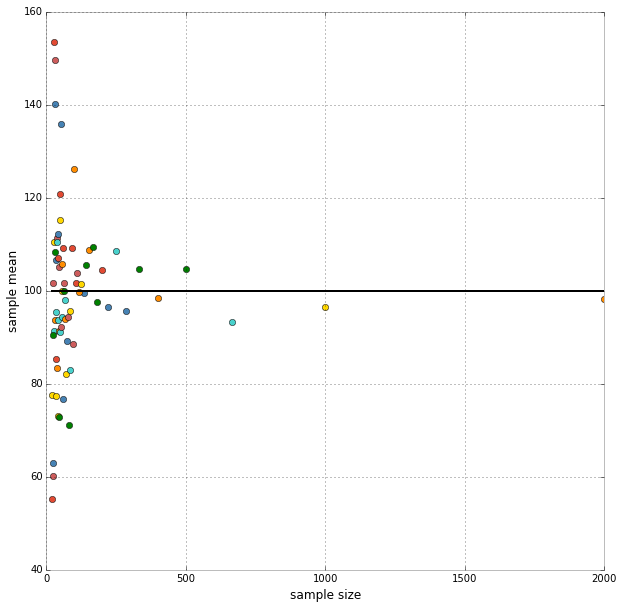

In [34]:
means['geometric'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111) 
for nn in distributions['geometric'].iterkeys():
    means['geometric'][nn] = distributions['geometric'][nn].mean()
    axchisq_mu_n.plot(nn,distributions['geometric'][nn].mean(),'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(sizes),max(sizes)],[mymean,mymean],'k')

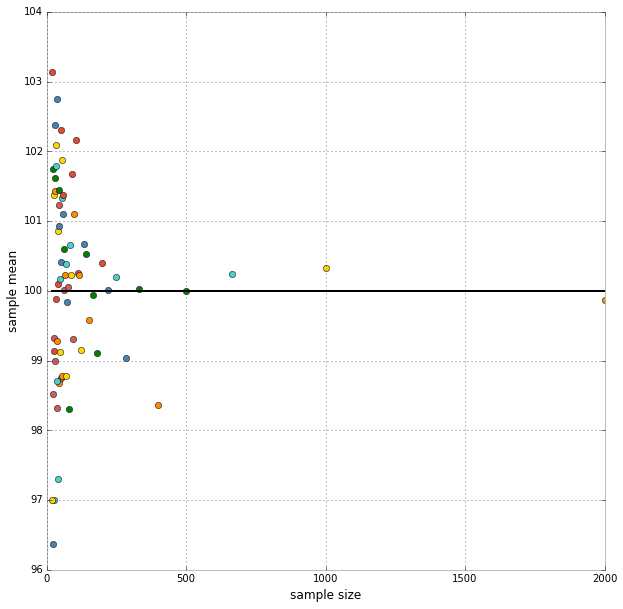

In [38]:
means['poisson'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111) 
for nn in distributions['poisson'].iterkeys():
    means['poisson'][nn] = distributions['poisson'][nn].mean()
    axchisq_mu_n.plot(nn,distributions['poisson'][nn].mean(),'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(sizes),max(sizes)],[mymean,mymean],'k')

According to the plots above, they look like what I expected since all means are more convergent to 100 when the sample size became larger.

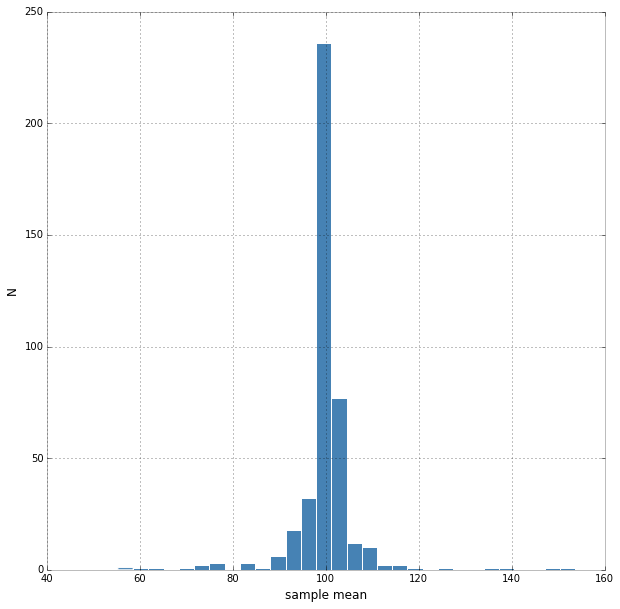

In [40]:
allmeans=[]
for n in means:
    for m in means[n]:
        allmeans.append(means[n][m])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean')
pl.ylabel('N')